In [7]:
reviews_train = []
for line in open('movie_data/full_train.txt', 'r',encoding='utf8'):
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('movie_data/full_test.txt', 'r',encoding='utf8'):
    reviews_test.append(line.strip())

In [12]:
y_train = [1 if i < 12500 else 0 for i in range(25000)]
y_test = [1 if i < 12500 else 0 for i in range(25000)]

In [13]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
words=set(stopwords.words('english'))

In [19]:
vectorizer=CountVectorizer(reviews_train,stop_words='english', min_df=4, strip_accents='ascii')
x_train=vectorizer.fit_transform(reviews_train)
x_test=vectorizer.transform(reviews_test)

In [29]:
import numpy as np
alpha=np.linspace(0.001,100,20)
scores=[]
for i in range(len(alpha)):
    NB=MultinomialNB(alpha=alpha[i])
    NB.fit(x_train,y_train)
    scores.append(NB.score(x_test,y_test))

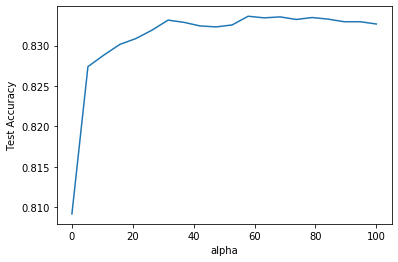

In [32]:
import matplotlib.pyplot as plt

plt.plot(alpha, scores)
plt.xlabel('alpha')
plt.ylabel('Test Accuracy')
plt.show()

In [39]:
from sklearn.svm import LinearSVC


svc=LinearSVC(penalty='l1',loss='squared_hinge', dual=False)
svc.fit(x_train,y_train)
svc.score(x_test,y_test)



0.83504